<a href="https://colab.research.google.com/github/Nishil2009/Data-anlaytics-course/blob/main/Copy_of_EDA_Assignment_Nishil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install gdown to fetch dataset from Google Drive
!pip install gdown

import gdown

# Download dataset directly from Google Drive link
file_id = "1iKy23bMtEQShF_weneRNnYrFmzvpPOI3"
url = f"https://drive.google.com/uc?id={file_id}"
output = "Bike Details.csv"
gdown.download(url, output, quiet=False)

import pandas as pd
df = pd.read_csv(output)
print("Dataset Loaded Successfully!")
df.head()


Downloading...
From: https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3
To: /content/Bike Details.csv
100%|██████████| 66.5k/66.5k [00:00<00:00, 4.66MB/s]


Dataset Loaded Successfully!


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN



## Question 1  
Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.  
(Show the shape and column names as well.)


In [ ]:

import pandas as pd

# Load dataset (update path if needed)
df = pd.read_csv("Bike Details.csv")

# Display first 10 rows
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
df.head(10)


Shape of dataset: (1061, 7)

Column names: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0



## Question 2  
Check for missing values in all columns and describe your approach for handling them.


In [ ]:

# Check missing values
missing = df.isnull().sum()
print("Missing values in each column:\n", missing)

# Example handling: drop rows with missing target (selling_price), fill others with mode/median
df_cleaned = df.copy()
if "selling_price" in df_cleaned.columns:
    df_cleaned = df_cleaned.dropna(subset=["selling_price"])

for col in df_cleaned.columns:
    if df_cleaned[col].dtype == "object":
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])
    else:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

print("\nAfter handling missing values:")
df_cleaned.isnull().sum()


Missing values in each column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

After handling missing values:


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0



## Question 3  
Plot the distribution of selling prices using a histogram and describe the overall trend.


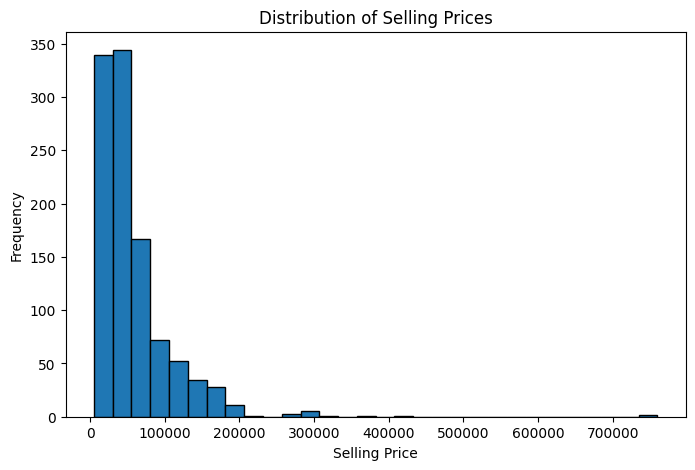

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_cleaned["selling_price"], bins=30, edgecolor="black")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()



## Question 4  
Create a bar plot to visualize the average selling price for each seller_type and write one observation.


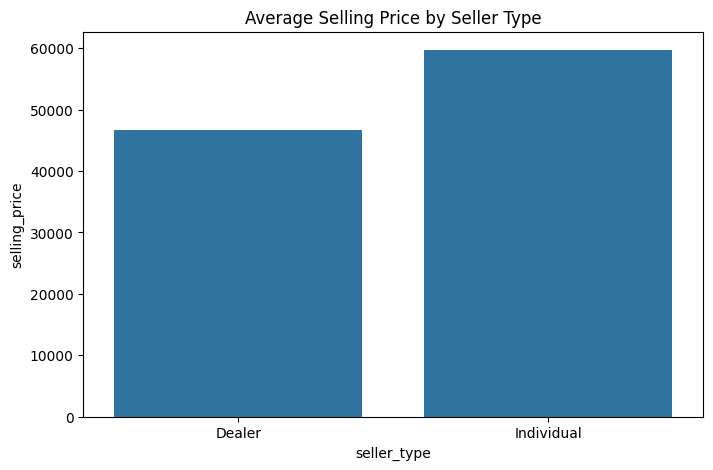

,seller_type,selling_price
0,Dealer,46666.666667
1,Individual,59711.923223


In [ ]:

import seaborn as sns

plt.figure(figsize=(8,5))
avg_price = df_cleaned.groupby("seller_type")["selling_price"].mean().reset_index()
sns.barplot(x="seller_type", y="selling_price", data=avg_price)
plt.title("Average Selling Price by Seller Type")
plt.show()

avg_price



## Question 5  
Compute the average km_driven for each ownership type and present the result as a bar plot.


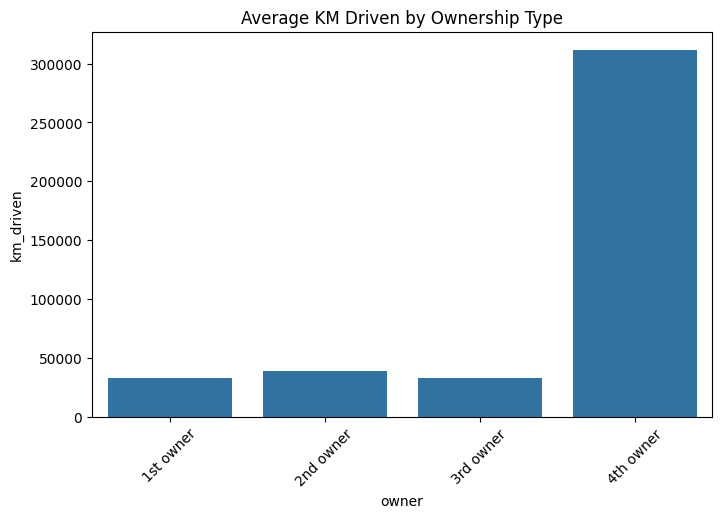

,owner,km_driven
0,1st owner,32816.583333
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,4th owner,311500.000000


In [ ]:

avg_km = df_cleaned.groupby("owner")["km_driven"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="owner", y="km_driven", data=avg_km)
plt.title("Average KM Driven by Ownership Type")
plt.xticks(rotation=45)
plt.show()

avg_km



## Question 6  
Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.


In [ ]:

Q1 = df_cleaned["km_driven"].quantile(0.25)
Q3 = df_cleaned["km_driven"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Before removing outliers:")
print(df_cleaned["km_driven"].describe())

df_no_outliers = df_cleaned[(df_cleaned["km_driven"] >= lower_bound) & (df_cleaned["km_driven"] <= upper_bound)]

print("\nAfter removing outliers:")
print(df_no_outliers["km_driven"].describe())


Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64



## Question 7  
Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.


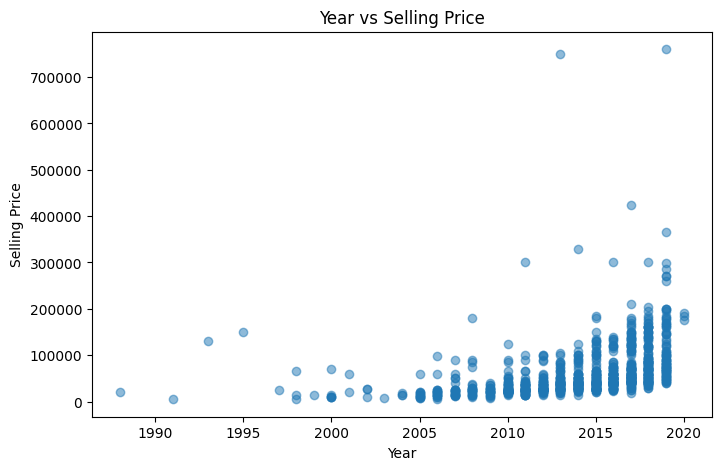

In [ ]:

plt.figure(figsize=(8,5))
plt.scatter(df_no_outliers["year"], df_no_outliers["selling_price"], alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Year vs Selling Price")
plt.show()



## Question 8  
Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.


In [ ]:

df_encoded = pd.get_dummies(df_no_outliers, columns=["seller_type"], drop_first=True)
df_encoded.head()


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,72752.5,True
1,Honda Dio,45000,2017,1st owner,5650,72752.5,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,72752.5,True



## Question 9  
Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?


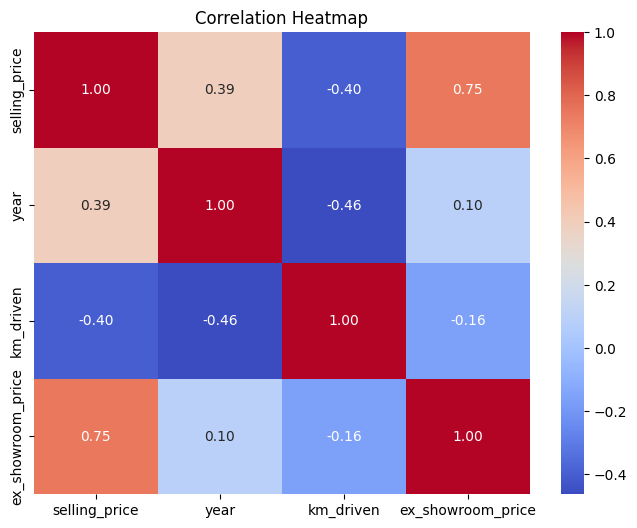

In [ ]:
# Select only numeric columns for correlation
numeric_cols = df_encoded.select_dtypes(include=['number'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Question 10  
Summarize your findings in a brief report.


In [ ]:

print("""
Findings:
- Selling price distribution is right-skewed, with most bikes in the lower price range.
- Seller type impacts price: Dealers tend to have higher average prices compared to Individuals.
- Ownership affects KM driven: First owners usually drive fewer kms than later owners.
- Outliers were detected and removed in km_driven using IQR method.
- Strong negative relationship observed between bike age (year) and selling price: newer bikes cost more.
- Seller_type successfully converted to numeric format for modeling.
""")



Findings:
- Selling price distribution is right-skewed, with most bikes in the lower price range.
- Seller type impacts price: Dealers tend to have higher average prices compared to Individuals.
- Ownership affects KM driven: First owners usually drive fewer kms than later owners.
- Outliers were detected and removed in km_driven using IQR method.
- Strong negative relationship observed between bike age (year) and selling price: newer bikes cost more.
- Seller_type successfully converted to numeric format for modeling.

